In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Comando para plotar gráficos no notebook
%matplotlib inline

In [2]:
#Importando dados em csv
train = pd.read_csv('titanic_train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Contagem de dados
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
#Checando as primeiras 5 linhas
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


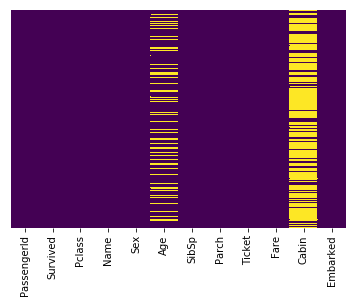

In [6]:
#Checando se existem dados faltantes
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap='viridis')
plt.show()

#As linhas em amarelo mostram os dados faltantes (Age e Cabin)

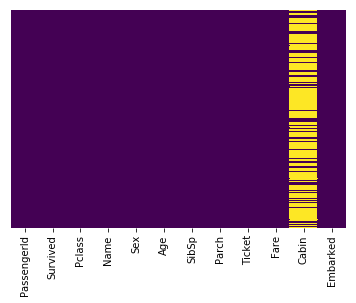

In [7]:
#Criação de uma função para retornar a idade média baseada nas classes
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
    
#Preenchendo os valores
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

#Checando novamento os valores faltantes
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap='viridis')
plt.show()

In [8]:
#Removendo colunas que não são importantes para a regressão
train.drop(['Cabin', 'Name', 'Ticket'], axis = 1, inplace=True) #inplace = True will not show you the values

#Mostrando as cinco primeiras linhas
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [9]:
#Create a new variable sex with only one column, 1 as male and 0 as female.
sex = pd.get_dummies(train['Sex'], drop_first = True) #drop_fist = True will drop the first column as not relevant

#Create a new variable embark with two column, if both Q and S are zero it means C is 1. 
embark = pd.get_dummies(train['Embarked'], drop_first = True) #first column is not required

#Drop the old column 'Sex' and 'Embarked'
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

#Create a new data set with quantitative information
train_new = pd.concat([train, sex, embark], axis=1)

#Display first five values
train_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [10]:
#import train_test_split function
from sklearn.model_selection import train_test_split

#Create your input and ouput data set
X = train.drop('Survived', axis = 1)
y = train['Survived']

#Divide your data set into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

#Import the Logistic Regression Model and Train/Tet the model
from sklearn.linear_model import LogisticRegression

#Initialize the model to null
logmodel = LogisticRegression()

# Use fit method to train the model
logmodel.fit(X_train, y_train)

#Use predict method to test the model
predictions = logmodel.predict(X_test)

#Import Classification report from sklearn to show the analysis
from sklearn.metrics import classification_report

# Show classification report parameters
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.67      0.89      0.77       154
          1       0.73      0.41      0.53       114

avg / total       0.70      0.69      0.66       268



### Modelo com 70% de precisão média